# Online Data

The internet is probably the most common place to seek information. In fact, every homepage you browse and every article you read is data and, as long as there is no pay wall or other security feature, free to you. Most of the data in such form is unordered and cannot easily be analysed quantitatively, like text or video clips (especially text usually does carry a lot of information). Beside this unstructured data, there are files for free to download, e.g. in a .csv format. Yet, all this has to be done by hand: either click some 'download' button to acquire a file or, even worse, copy a text online and paste it into a document.

In the next sections, we will at first briefly introduce some basic elements of online communication and then present different ways to access data online from our computer without loading and storing it manually (we will write code manually, though).

## Website basics  

### HTTP 

The **H**yper**T**ext **T**ransfer **P**rotocol is used for online communication in the world wide web (www). The basic operations are *requests* and *response*. In the www, when trying to open a website, you are actually sending a request to a server asking to provide the information stored under that web address. The server will then hopefully respond to your request by sending the respective information to your machine which then will be rendered in your browser. This response information does contain additional meta data, like the time of the request, status/error codes, etc which we will see later. An extension is **https** (**s**ecure).

### URL

The **U**niform **R**esource **L**ocator is the address your request is telling the server to look for information. It consists of several elements, ```http://www.uni-passau.de```:

- the protocol: usually ```http``` or ```https``` in the www, followed by a colon and doube slash ```://```

- the hostname: ```www.uni-passau.de``` 

- a path/query: appended with ```/``` or ```?``` to the hostname

To know about these three separate parts enables us to automate navigation in the www using python.

### HTML

Information in the www is usually found in the **H**yper**T**ext **M**arkup **L**anguage for web browsers. HTML uses **tags** to structure hierarchical data, telling the browser how to display the single elements. Tags appear in pairs and are enclosed in angle brackets ```<tag>``` to open a respective section and ```</tag>``` to close it.\
Any HTML will be enclosed in the most outer ```<html>``` and ```</html>``` tags. Inside this, the document is structured by various tags. To name just some: 

- ```<body>```: the main part of a website containing the displayed information

- ```<div>```: division, denotes a section

- ```<p>```: paragraph, simple text information

- ```<table>```: displays data in a table, (```<tr>``` for single rows)

- ```<b>```: bold, does not structure the page, but alters the font 

Beside the tag itself attributes may be included inside the brackets. With the right tools, we can exploit tags and attributes to navigate to specific elements on webpages in order to extract the element information. Very common attributes are ```id``` and ```class```. 

A simple html may look like this (inside """ and indented):

In [1]:
"""
<html>
  <body>
    <div id='div_1'>
      <p class='section' id ='intro'>
        This is a brief introduction to <b>HTML</b>.
      </p>
    </div>
  </body>
</html>
"""

"\n<html>\n  <body>\n    <div id='div_1'>\n      <p class='section' id ='intro'>\n        This is a brief introduction to <b>HTML</b>.\n      </p>\n    </div>\n  </body>\n</html>\n"

Since jupyter works with html, we can render the above html directly in a markdown cell: 

<html> 
  <body> 
    <div id='div_1'> 
      <p class='section' id ='intro'>
        This is a brief introduction to <b>HTML</b>. 
      </p> 
    </div> 
  </body>
</html> 

### JSON

The **J**ava**S**cript **O**bject **N**otation is a type of data format which you will frequently encounter when working with online data. For one, websites that offer a .scv download often also offer a .json file to download. Moreover, the json format is often used by APIs (see next secrtion) to transfer data. Its structure looks is very similar to a python dictionary, using curly and square brackets and key-value pairs as well as enabling nesting. Data is therefore stored in such objects. There are packages which can handle json files, for example pandas to transform it into a dataframe. 

Let's see what a dataframe looks like when transformed into a json format:

In [2]:
import pandas as pd

df = pd.DataFrame([[19, 55], [22, 64]],
index=["obj_1", "obj_2"],
columns=["length", "height"])
df

,length,height
obj_1,19,55
obj_2,22,64


And the respective json format, created with the ```to_json()``` method:

In [3]:
print(df.to_json()) 

{"length":{"obj_1":19,"obj_2":22},"height":{"obj_1":55,"obj_2":64}}


In [4]:
# back to dataframe with read_json()
pd.read_json(df.to_json())

,length,height
obj_1,19,55
obj_2,22,64


## API

Instead of (or in addition to) any downloadable files, data providers may offer an **API** (**A**pplication **P**rogramming **I**nterface) to access data. An API constitutes a rather convenient way to getting information as it allows direct machine to machine transaction - meaning you can log in, select and download data directly with and into python. With reliable API access, it is thus not necessary to store the data on your hard drive permanently (you must however do so temporarily). \
The two most basic operations when working with an API over http:

- GET: send a request and *get* a response from the server, for example the data you asked for

- POST: send information to the API, for example to add data to a database remotely

Many large companies offer APIs for programmers, for example the google maps API is often used on web pages where directions are explained or Twitter offers an API where tweets and meta data are provided. These APIs usually are not free. However, free APIs do exist for many topics of data, [see here](https://github.com/public-apis/public-apis/blob/master/README.md) for example . \
Normally, the procedure is to register an e-mail account to get an **identification key**. This key is needed to use the API from your computer and enables the provider to track your activity. For example, if only *n* downloads are free per day, too unrestrained a downloading business might even get you kicked or banned. In any case, to work properly with an API, one should read the documentary (or at least parts of it).

In general, we will use the [```requests```](https://requests.readthedocs.io/en/master/) package for working with APIs.

For a first and simpler example, though, we can make use of a package called [```wikipediaapi```](https://pypi.org/project/Wikipedia-API/) implementing the [Wikipedia API](https://www.mediawiki.org/wiki/API:Main_page). Whenever working with APIs, it is advised to look for trustworthy implementations, since the work might have been done for you already. We will then go on to produce the same result using the requests package.

As usual, the first step is to import the packages (if already installed).

In [5]:
import wikipediaapi

In [6]:
# instantiate object and call page method
wiki_en = wikipediaapi.Wikipedia('en')
page = wiki_en.page('University_of_Passau') 

In [7]:
print('title:\n', page.title)
print('\nsummary:\n',page.summary)

title:
 University_of_Passau



summary:
 The University of Passau (Universität Passau in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.


The API from the ```wikipediaapi``` package returns preprocessed data from the respective article.


Since APIs may come without such handy packages, we will now engage the ```requests```package to perform the same tasks.\
At first, we import the package under the alias ```re```.

In [8]:
import requests as re

In [9]:
wiki_url = 'https://en.wikipedia.org/w/api.php'

# store parameters as dictionary to pass to function, may include key and username for authentication 
# the parameters are found in the documentary!
params = {'action': 'query',
         'format': 'json',
         'titles': 'University_of_Passau',
         'prop': 'extracts',
         'exintro': 1,
         'disablelimitreport':1}

response = re.get(wiki_url, params=params)
print(type(response))

<class 'requests.models.Response'>


In [10]:
# check, if request was successful
response.status_code    # -> 200 

200

Having a successful request, we can now take a look at the response object's elements. Since the format was specified as json in our request, we can use the built-in ```.json()``` method.\
To display a json file in a more readbale manner (indents, linebreaks), we can use the ```json``` package and its ```dumps```method.

In [11]:
import json

In [12]:
print(json.dumps(response.json(), indent=4))

{
    "batchcomplete": "",
    "warnings": {
        "main": {
            "*": "Unrecognized parameter: disablelimitreport."
        },
        "extracts": {
            "*": "HTML may be malformed and/or unbalanced and may omit inline images. Use at your own risk. Known problems are listed at https://www.mediawiki.org/wiki/Special:MyLanguage/Extension:TextExtracts#Caveats."
        }
    },
    "query": {
        "normalized": [
            {
                "from": "University_of_Passau",
                "to": "University of Passau"
            }
        ],
        "pages": {
            "409091": {
                "pageid": 409091,
                "ns": 0,
                "title": "University of Passau",
                "extract": "<p class=\"mw-empty-elt\">\n</p>\n\n<p>The <b>University of Passau</b> (<i>Universit\u00e4t Passau</i> in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and con

In [13]:
# we can now navigate through the nested dictionaries
title = response.json()['query']['pages']['409091']['title']
print('title: ',title)
summary = response.json()['query']['pages']['409091']['extract']
print('\nsummary:', summary)

title:  University of Passau

summary: <p class="mw-empty-elt">
</p>

<p>The <b>University of Passau</b> (<i>Universität Passau</i> in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
</p><p>Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.</p>





Since the Text is still in html, as can be seen from tags, we are not yet finished. To convert html to normal text, one way is by using [**BeautifulSoup**.](https://pypi.org/project/beautifulsoup4/)\
Let's import it from the ```bs4``` package and transform the html.

In [14]:
from bs4 import BeautifulSoup

# first instantiate object, use 'lxml' parser (installation necessary) 
my_soup = BeautifulSoup(summary, 'lxml')

# extract the text, i.e. remove tags
print(my_soup.text)



The University of Passau (Universität Passau in German) is a public research university located in Passau, Lower Bavaria, Germany. Founded in 1973, it is the youngest university in Bavaria and consequently has the most modern campus in the state. Nevertheless, its roots as the Institute for Catholic Studies dates back to the early 17th century.
Today it is home to four faculties and 39 different undergraduate and postgraduate degree programmes.



### Website content
BeautifulSoup can not only extract text from html, but, in analogy to the json ```dumps()``` method from before, print html files more readable. We will leverage BeautifulSoup's functions now to extract again the same information, but now from the website directly, i.e. without an API.


In [15]:
# first, send request - get response from ordinary url
response = re.get('https://en.wikipedia.org/wiki/University_of_Passau')

# second, extract content from the response (html)
html = response.content

# third, instantiate BS onject
soup = BeautifulSoup(html)

# if necessary look at a formatted version of the html
# print(soup.prettify())     # -> very long output

In [16]:
# finally print the text attribute from the created object
print(soup.text[588:1037])     # only part of document for shorter output 

























Contents
move to sidebar
hide




(Top)





1History







2Campus



Toggle Campus subsection





2.1Library









3Organisation



Toggle Organisation subsection





3.1Governance







3.2Faculties







3.3Associated institutes







3.4Research centres









4Partnerships







5Rankings







6Student life



Toggle Student life subsection





6.1Student associations







6.2Sports







6.3Frater


In [17]:
soup.find('p').getText()

'\n'

We can see, that we loaded the whole website as raw text. One can immediately see that it is not obvious how to extract the wanted summary only. We will later see some ways to extract text and leverage repeated structure across a website for its different pages to extract text sections like this.

#### Back to APIs

Now, the API we will mostly use in this course is from [financialmodelingprep.com](https://financialmodelingprep.com/developer/docs/), providing financial and company data. In contrast to the Wikipedia API, a registration by e-mail is required. Please register to get your API key.

To access the data, the key must be submitted in the request. We can use the params statement as before, handing it the respective statements.

(Note that the API key is already saved in "api_key")

In [18]:
api_key = 'my_key'
api_key = '44c50c7a71efa92e8dac68f5902ea0ec'

In [19]:
# define components of the request
base_url = 'https://financialmodelingprep.com/api/v3/'
filing = 'profile'
stock = 'GOOG'
params = {'apikey': api_key}

# send request and store reponse
response = re.get(base_url+filing+'/'+stock, params=params)

In [20]:
# Without further processing, the json is already quite well structured to read
response.json()

[{'symbol': 'GOOG',
  'price': 146.68,
  'beta': 1.058,
  'volAvg': 21805490,
  'mktCap': 1814736915447,
  'lastDiv': 0,
  'range': '88.86-155.2',
  'changes': 1.27,
  'companyName': 'Alphabet Inc.',
  'currency': 'USD',
  'cik': '0001652044',
  'isin': 'US02079K1079',
  'cusip': '02079K107',
  'exchange': 'NASDAQ Global Select',
  'exchangeShortName': 'NASDAQ',
  'industry': 'Internet Content & Information',
  'website': 'https://www.abc.xyz',
  'description': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit we

We can also load symbols from all companies listed in the Dow Jones Index and then load historical stock price data from those companies using the afore acquired symbols.

In [21]:
filing = 'dowjones_constituent'
response = re.get(base_url+filing, params=params)
print(response.status_code)

200


In [22]:
dji_df = pd.DataFrame.from_dict(response.json())
print(dji_df.head(3))

  symbol                          name       sector    subSector  \
0   AMGN                    Amgen Inc.   Healthcare   Healthcare   
1    CRM              Salesforce, Inc.   Technology   Technology   
2    HON  Honeywell International Inc.  Industrials  Industrials   

         headQuarter dateFirstAdded         cik     founded  
0  Thousand Oaks, CA     2020-08-31  0000318154  1980-04-08  
1  San Francisco, CA     2020-08-31  0001108524  1999-02-03  
2      Charlotte, NC     2020-08-31  0000773840  1906-01-01  


In [23]:
# extract symbol column and convert to list
dji_symbols = dji_df.symbol.tolist()
print(dji_symbols)

['AMGN', 'CRM', 'HON', 'GS', 'WBA', 'AAPL', 'NKE', 'V', 'UNH', 'CSCO', 'TRV', 'CVX', 'VZ', 'HD', 'INTC', 'MSFT', 'JNJ', 'WMT', 'CAT', 'DIS', 'DOW', 'JPM', 'BA', 'KO', 'MCD', 'AXP', 'IBM', 'MRK', 'MMM', 'PG']


In [24]:
# set the filing (from documentation)
filing = 'historical-price-full'

# create empty dataframe (before loop!) to collect data for every company in loop
dji_hist = pd.DataFrame()

# loop over first 5 symbols in the list
for symbol in dji_symbols[:5]:
    
    # request data for every symbol 
    response = re.get(base_url+filing+'/'+symbol, params=params)
    # break the loop if a response error occurs
    if response.status_code != 200:
        print('Error! Aborted')
        break
    # convert the response to json to temporary dataframe
    temp_df = pd.DataFrame.from_dict(response.json()['historical'], orient='columns')
    # add column with respective symbol
    temp_df['symbol'] = symbol
    # append temporary dataframe to collect dataframe 
    dji_hist = pd.concat([dji_hist, temp_df], ignore_index=True)
    # delete temporary dataframe before next iteration
    del temp_df

AxesSubplot(0.125,0.11;0.775x0.77)


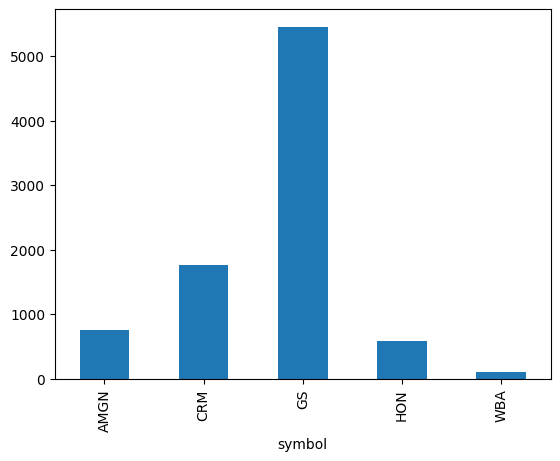

In [25]:
# just one example to show all companies' data made it to the collect dataframe: variance of opening price 
print(dji_hist.groupby('symbol').open.var().plot(kind='bar'))

We now know how to retrieve data from an API or the whole html content from a normal website. The next chapter will look at how we can extract information displayed on websites in a more directed manner than downloading just all of the website's content.